# 그래픽 객체
<!-- 6-2 -->


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##################################################### 6-1-1 ###########################################################
# seaborn에 있는 dataset 확인
sns.get_dataset_names()
len(sns.get_dataset_names())

# tips dataset 불러오기
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Tips data description
- One waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected several variables:
- A data frame with 244 observations on the following 8 variables.
    - sex: a factor with levels Female Male, gender of the payer of the bill
    - smoker: a factor with levels No Yes, whether the party included smokers
    - day: a factor with levels Friday Saturday Sunday Thursday, day of the week
    - time:  a factor with levels Day Night, rough time of day
    - size: PartySize

In [78]:
# tips dataset에 대한 정보
print(tips.columns)
tips.groupby("day")[["total_bill", "tip"]].mean()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'weekend'], dtype='object')


,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


In [87]:
tips['tips_percentage'] = tips['total_bill']/tips['tip']
tips.groupby(["day",'time'])[["tips_percentage"]].count()

tips_percentage
day  time                   
Thur Lunch                61
     Dinner                1
Fri  Lunch                 7
     Dinner               12
Sat  Lunch                 0
     Dinner               87
Sun  Lunch                 0
     Dinner               76

In [90]:
tips['tips_percentage'] = tips['total_bill']/tips['tip']
tips.groupby(["day",'smoker'])[["tips_percentage"]].mean()

tips_percentage
day  smoker                 
Thur Yes            6.471532
     No             6.658424
Fri  Yes            6.206909
     No             6.764762
Sat  Yes            8.336102
     No             6.785127
Sun  Yes            7.715231
     No             6.808689

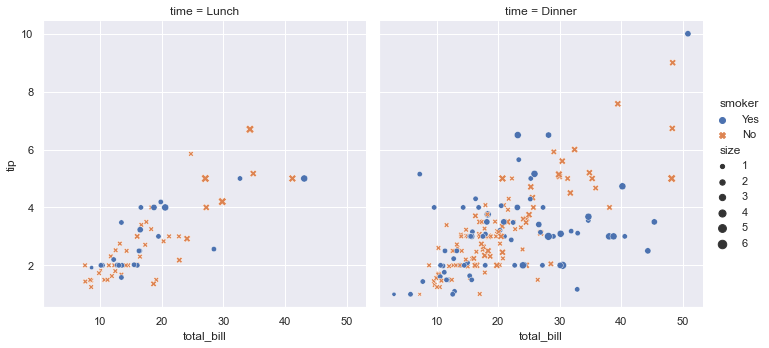

In [157]:
# default theme 적용하기
sns.set_theme()

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [16]:
#%%
##################################################### 6-1-2 ###########################################################
# Data structures accepted by seaborn
## Long-form data
"""Each variable is a column"""
"""Each observation is a row"""
flights = sns.load_dataset("flights")
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- 1월 승객의 연도별 추이를 시각화 하여라.
- 2월 승객의 연도별 추이를 시각화 하여라.

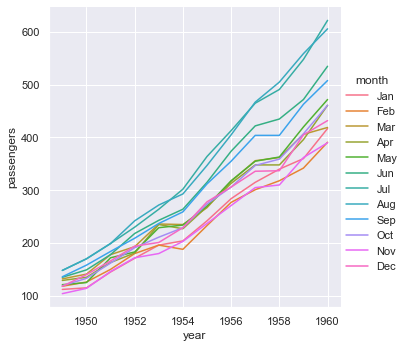

In [158]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

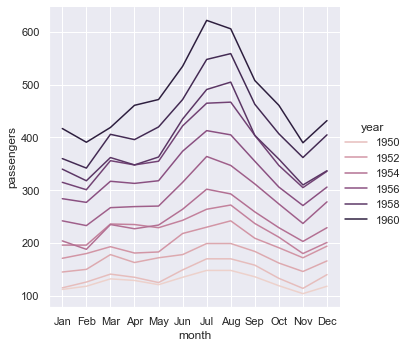

In [159]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

In [ ]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\seaborn\relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\envs\tf2\lib\site-packages\seaborn\relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


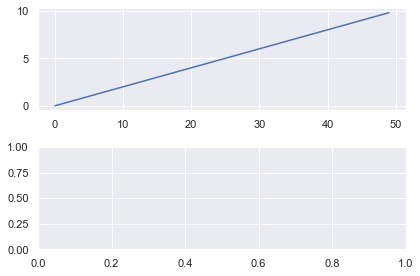

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

xdata = np.arange(50)

sns.set(style="ticks")
tips = sns.load_dataset("tips")
g1 = sns.relplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[0])
g2 = sns.relplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1])

# Now you can add any curves to individual axis objects 
ax[0].plot(xdata, xdata/5) 

# You will have to close the additional empty figures returned by replot
plt.close(g1.fig)
plt.close(g2.fig) 
plt.tight_layout()

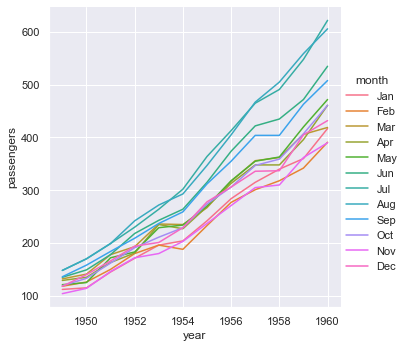

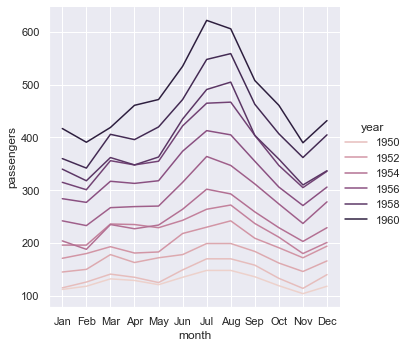

In [30]:
g1 = sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")
g2 = sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")


In [ ]:

sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")


In [32]:
## Wide-form data
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


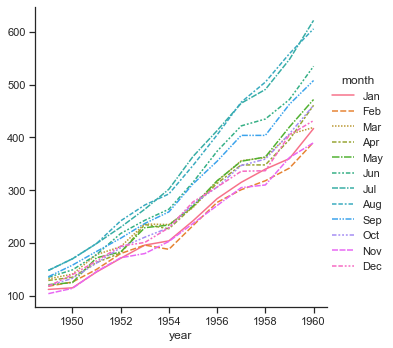

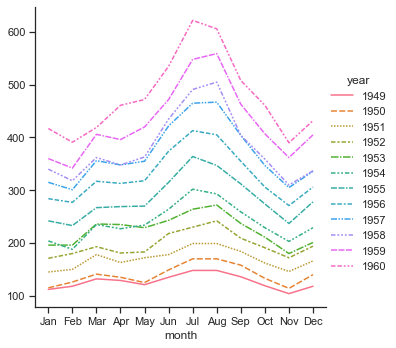

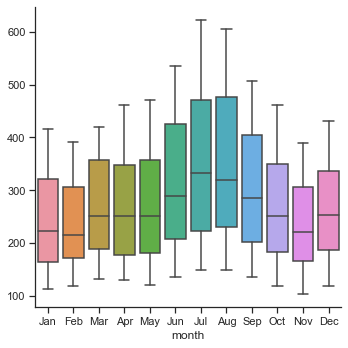

In [33]:
sns.relplot(data=flights_wide, kind="line")
sns.relplot( data=flights_wide.transpose(), kind="line")
sns.catplot(data=flights_wide, kind="box")

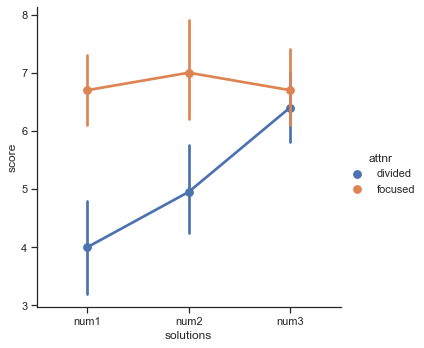

In [34]:
## Messy data
anagrams = sns.load_dataset("anagrams")
anagrams
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

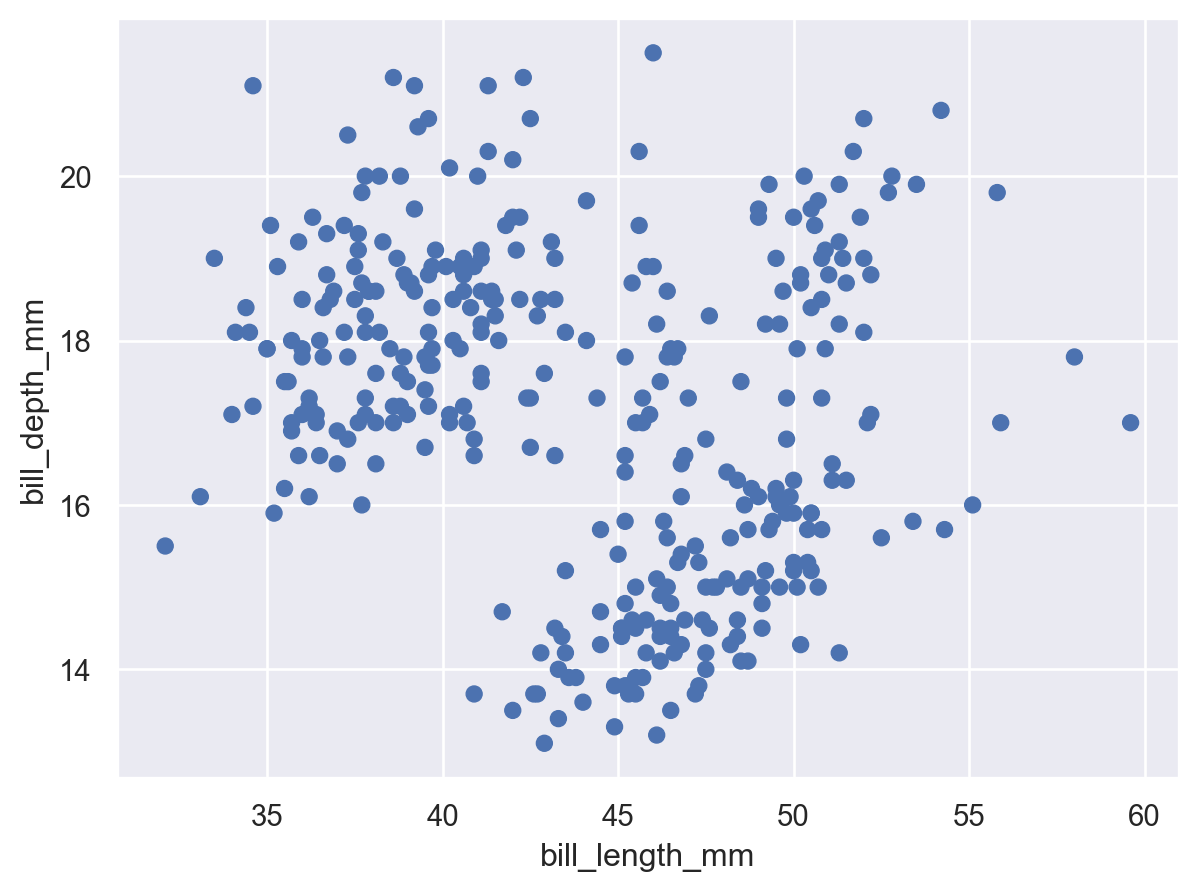

In [35]:
#%%
##################################################### 6-1-3 ###########################################################
# Specifying a plot and mapping data
## Setting properties
import seaborn.objects as so
penguins = sns.load_dataset("penguins")


### Data Description (Penguine)
- Variables
    - species a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
    <figure>
    <img src="./image/adelie.jpg"  height="100">
    <img src="./image/chinstrap.jpg" height="100">
    <img src="./image/gentoo.jpg" height="100">
    <figcaption> Fig: Adélie(좌), Chinstrap(중), Gentoo(우)</figcaption>    
    </figure>
    
    - island a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
    <figure>
    <img src="./image/island.png"  height="400">
    <figcaption> Fig: 남극지역 (
    출처: Gorman, Kristen B., Tony D. Williams, and William R. Fraser. "Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis)." PloS one 9.3 (2014): e90081) </figcaption>    
    </figure>
        
    - bill_length_mm a number denoting bill length (millimeters)
    - bill_depth_mm a number denoting bill depth (millimeters)

    <figure>
    <img src="./image/culmen_depth.png"  height="200">
    <figcaption> Fig: 부리구조 (https://allisonhorst.github.io/palmerpenguins/)
   </figcaption>    
    </figure>

    

    - flipper_length_mm an integer denoting flipper length (millimeters)
    - body_mass_g an integer denoting body mass (grams)
    - sex a factor denoting penguin sex (female, male)
- Missing values


https://allisonhorst.github.io/palmerpenguins/



In [115]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [113]:
np.sum(penguins['bill_length_mm'].isna())

2

In [114]:
df_col = penguins.columns
for i in df_col:
    v = np.sum(penguins[i].isna())
    if v>0:
        print("NaN is included in {}: #{}".format(i,v))

NaN is included in bill_length_mm: #2
NaN is included in bill_depth_mm: #2
NaN is included in flipper_length_mm: #2
NaN is included in body_mass_g: #2
NaN is included in sex: #11


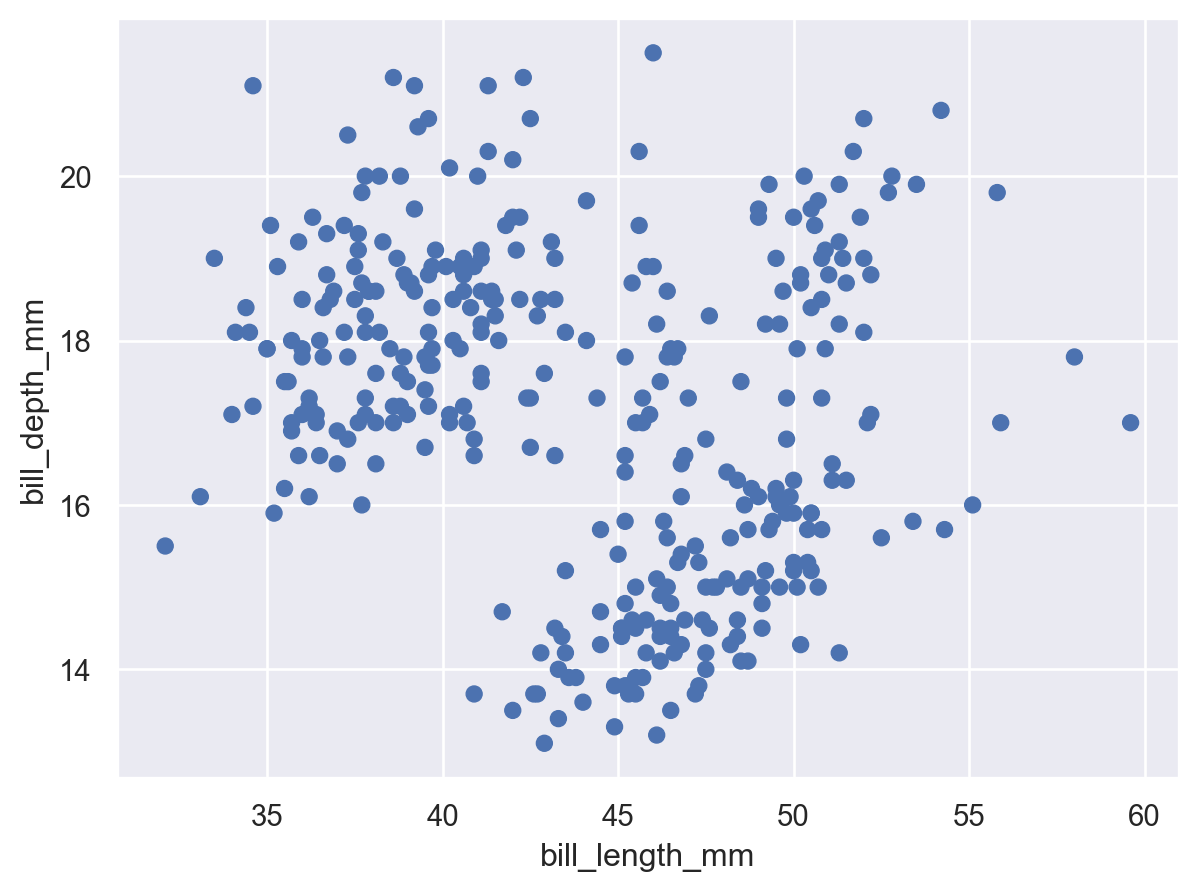

In [111]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

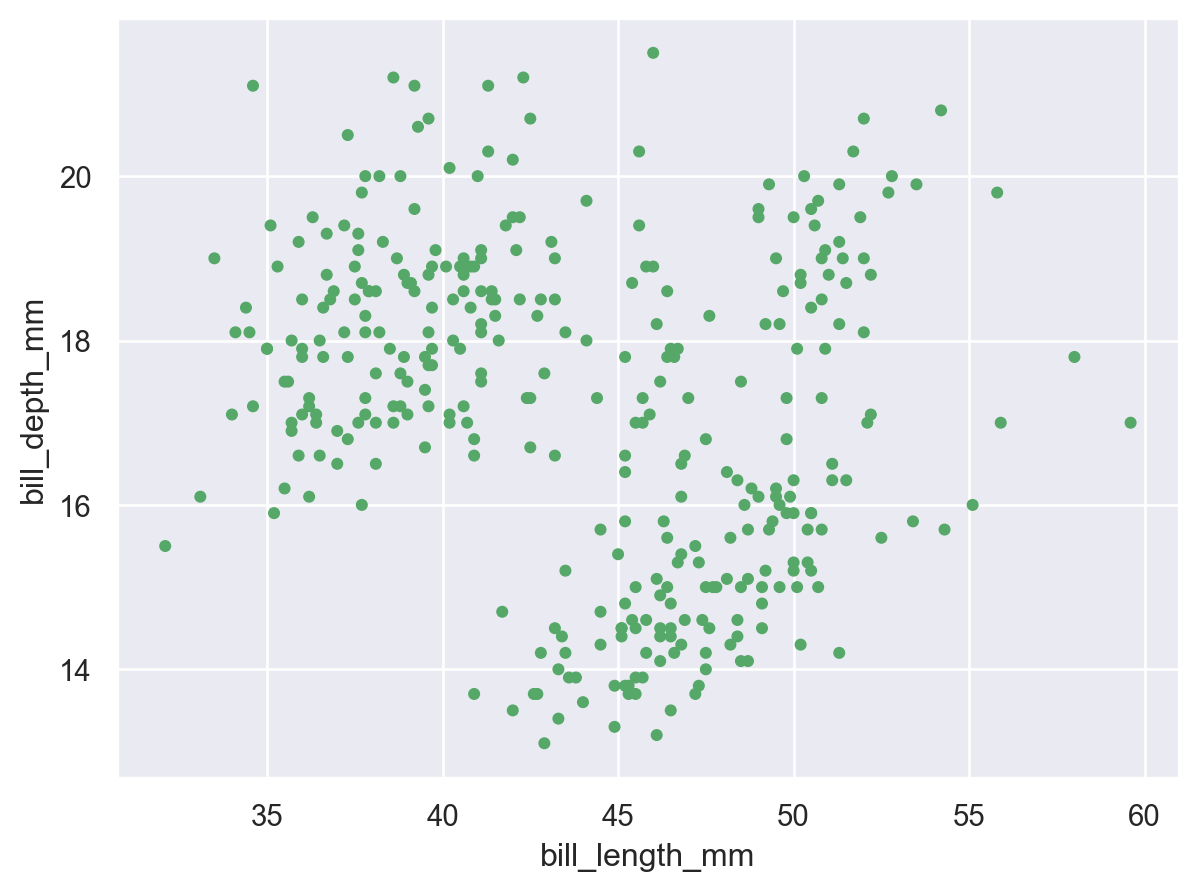

In [112]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

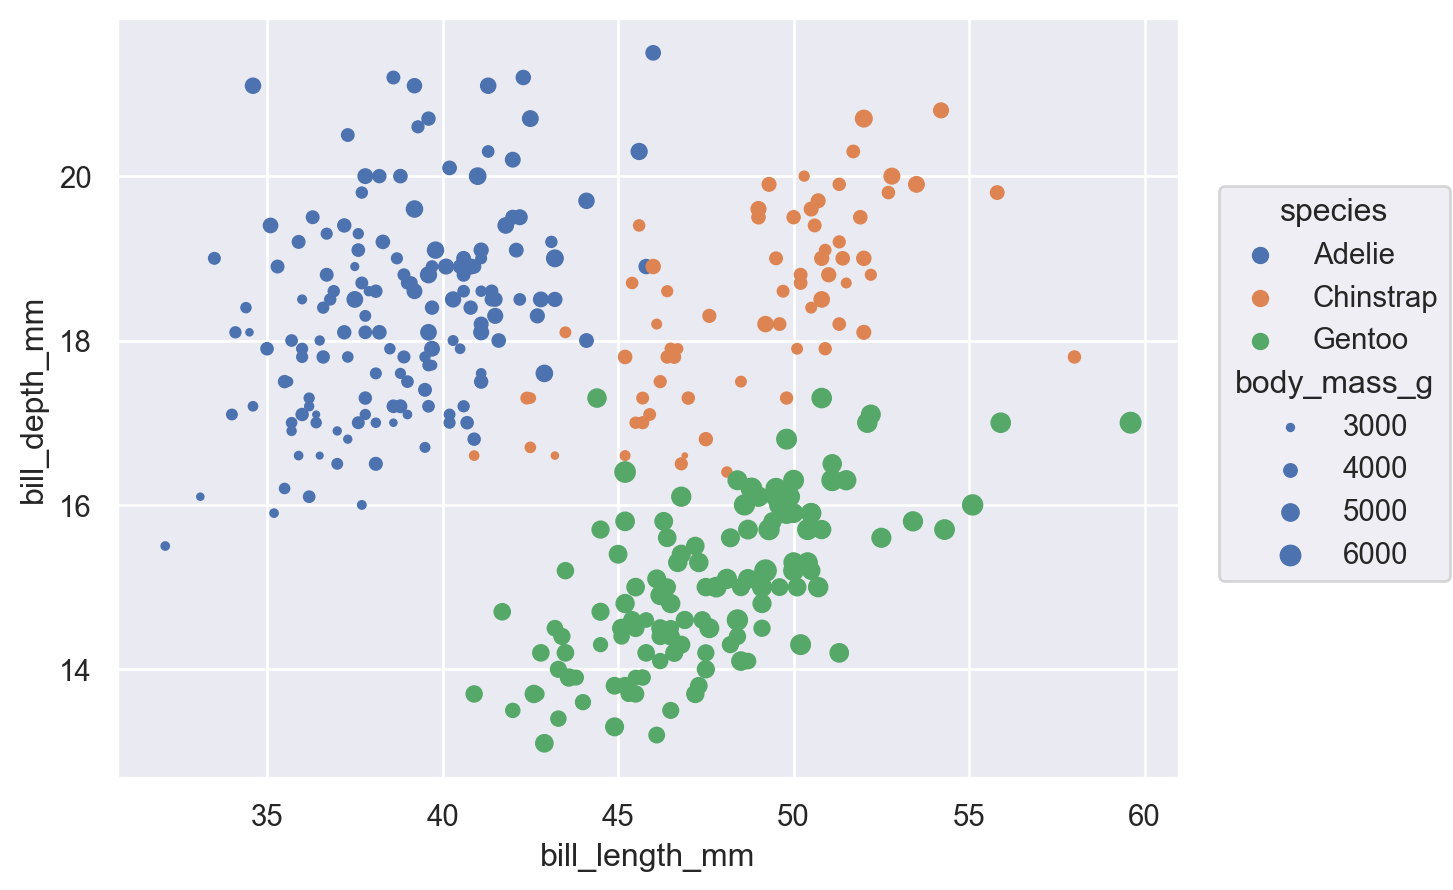

In [37]:
## Mapping properties
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

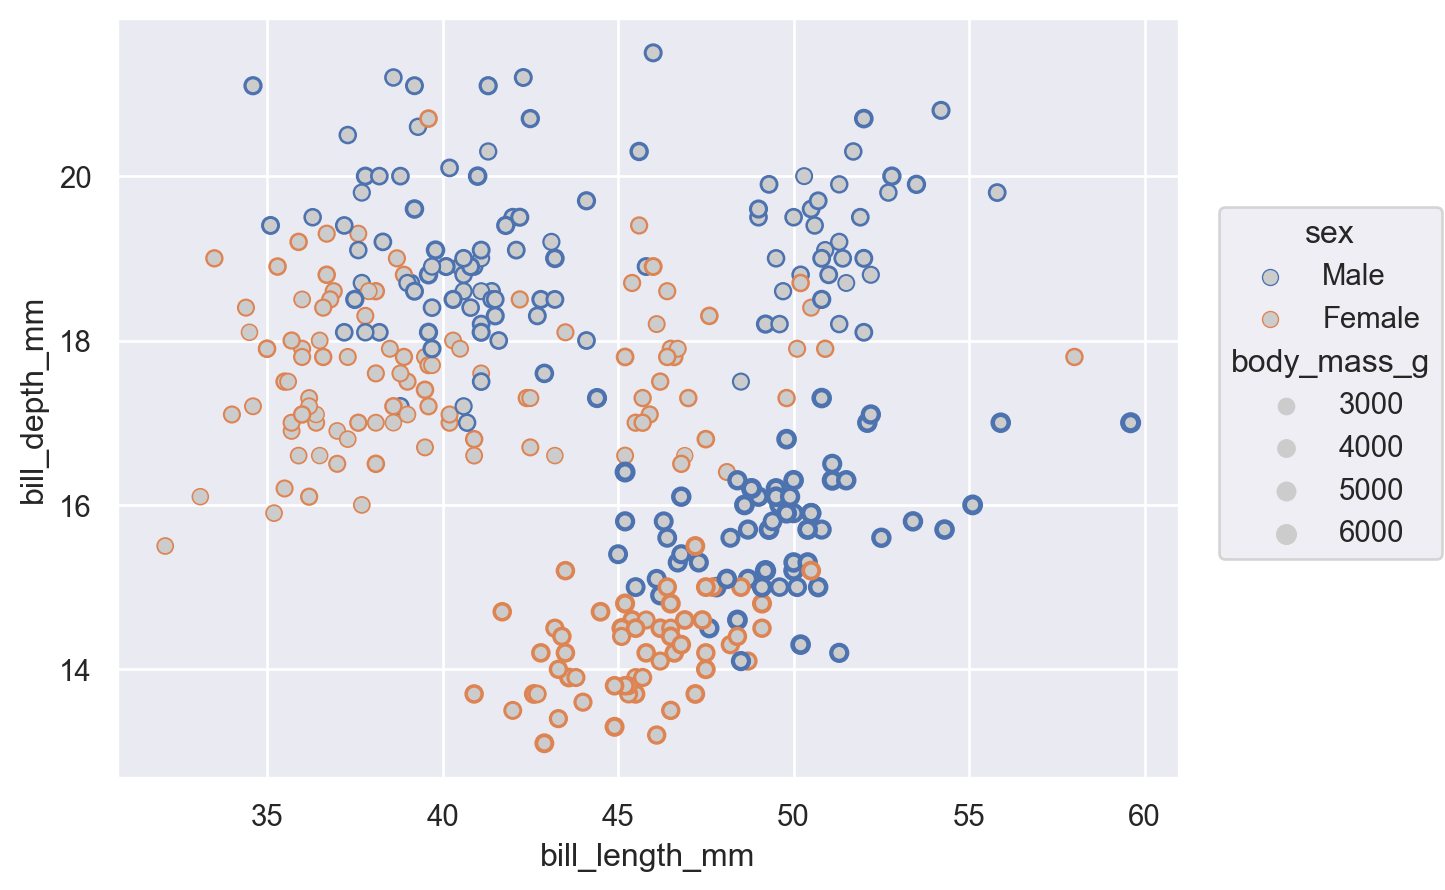

In [38]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

In [92]:
## Defining groups
healthexp = sns.load_dataset("healthexp")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


### Data Descrtion (health expenditure)
- year
- country
- spendign USD
- Life_Expectancy

In [93]:
healthexp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [94]:
healthexp['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

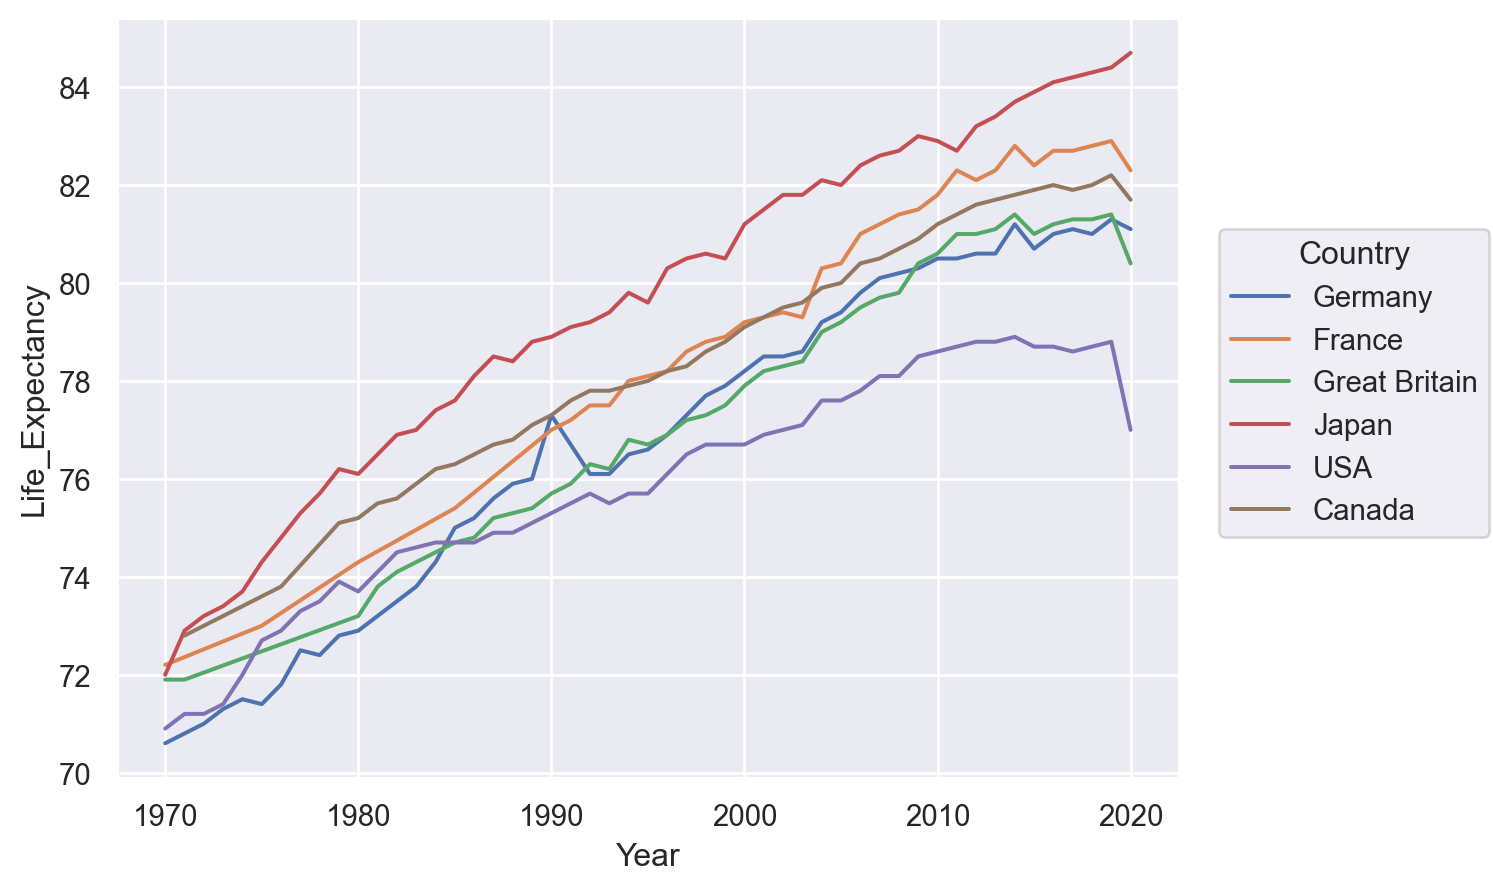

In [95]:

(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

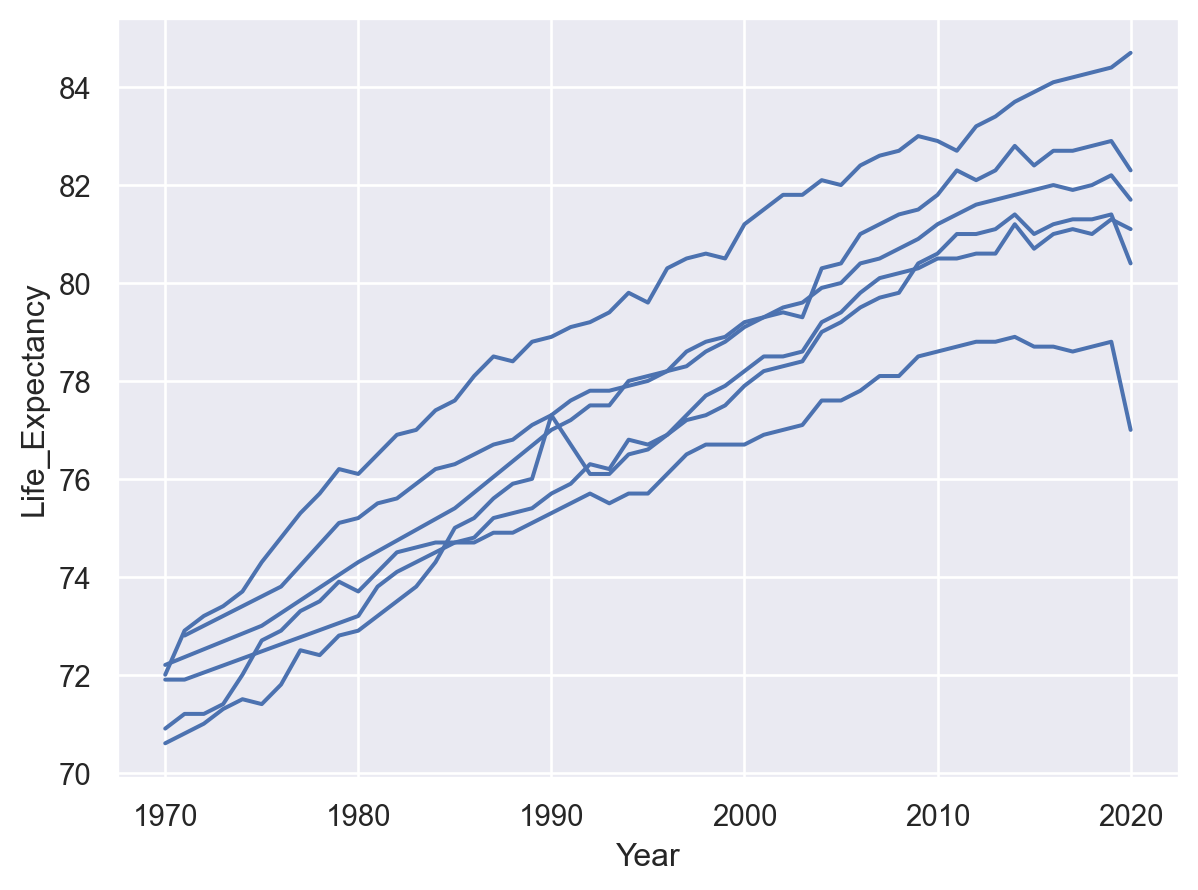

In [40]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

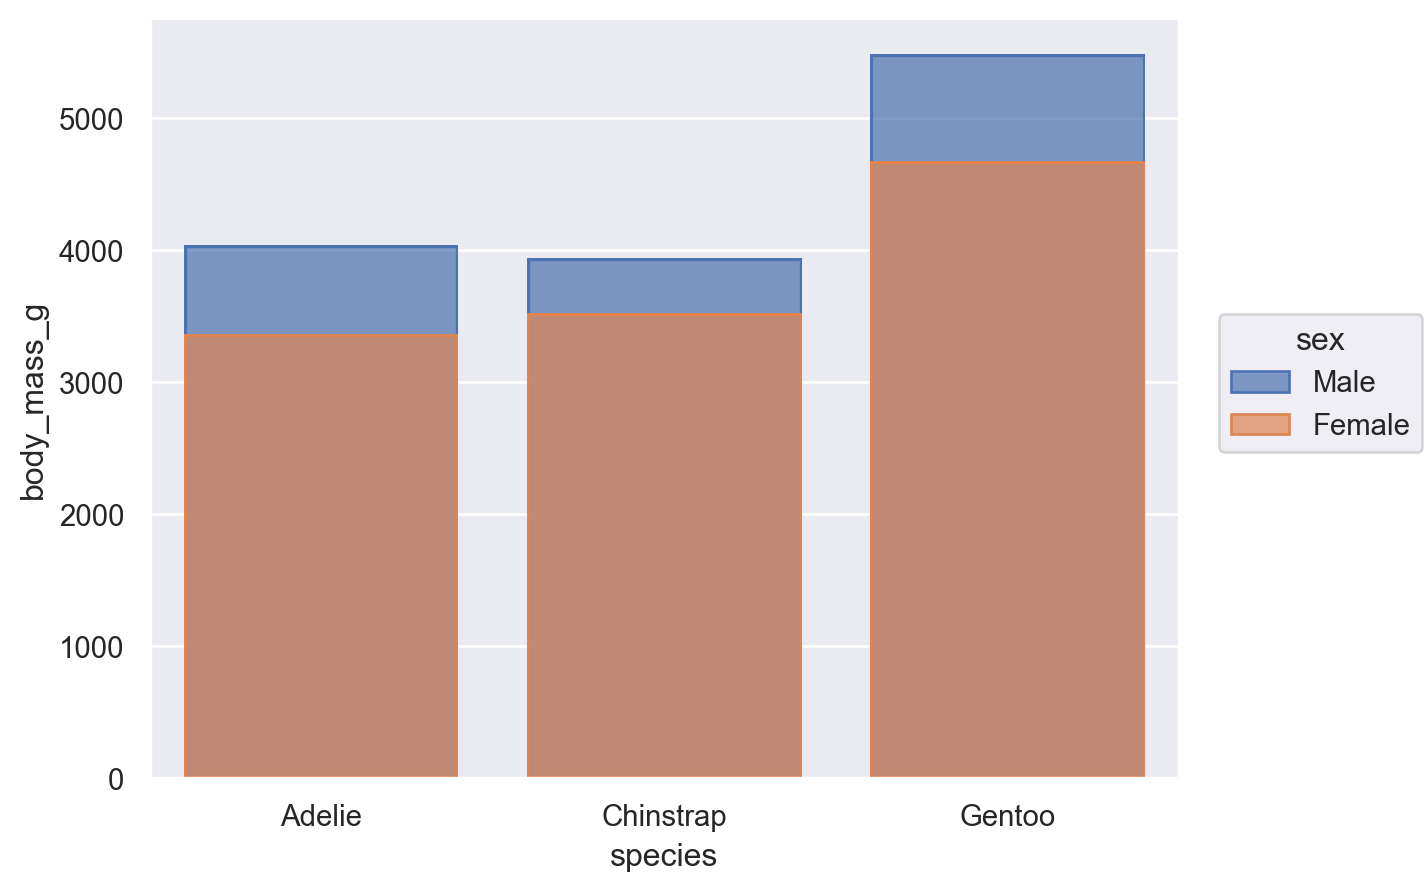

In [41]:
# Transforming data before plotting
## Resolving overplotting
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

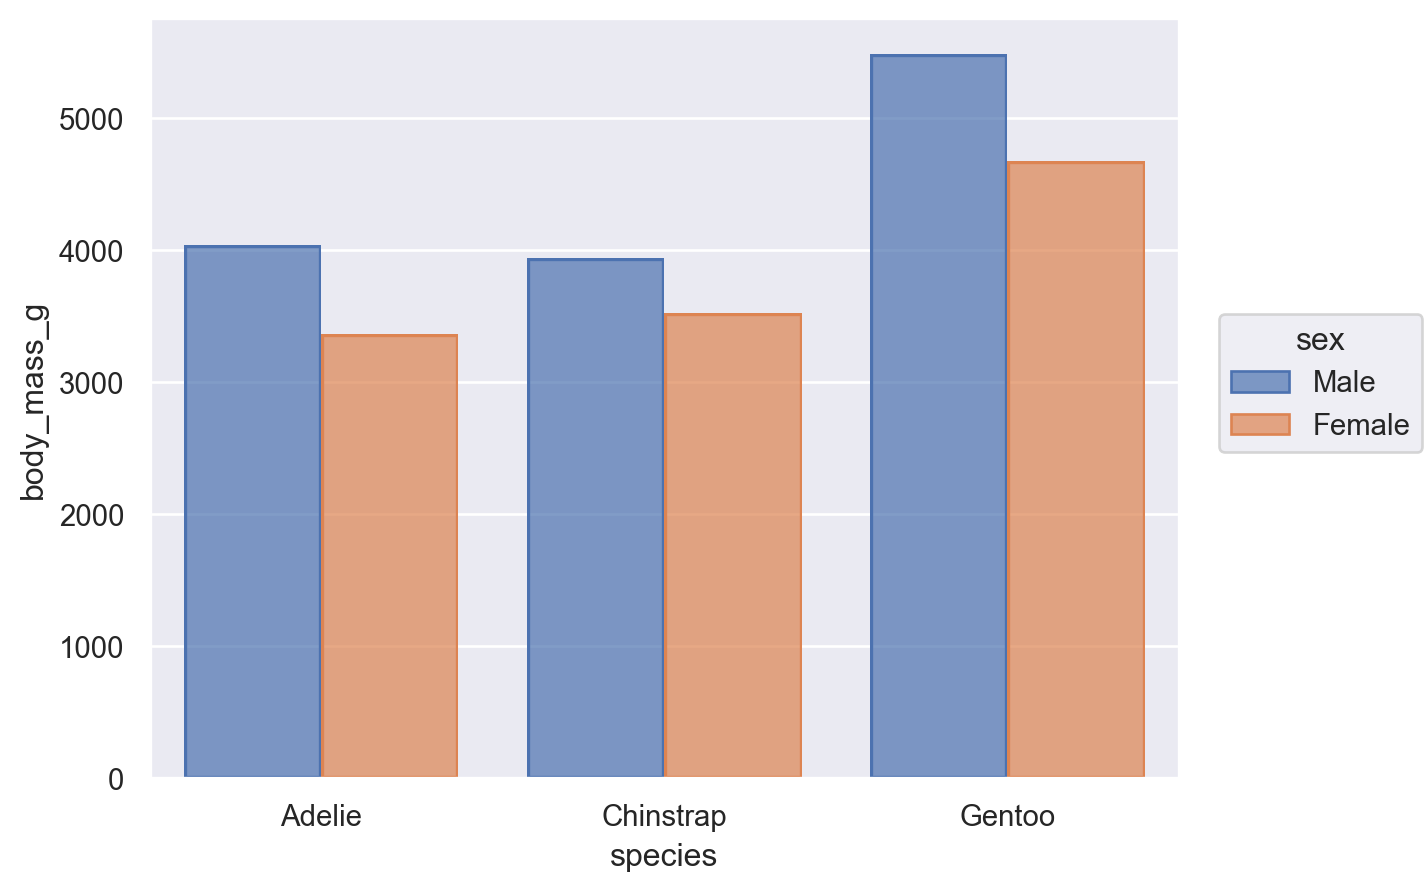

In [42]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

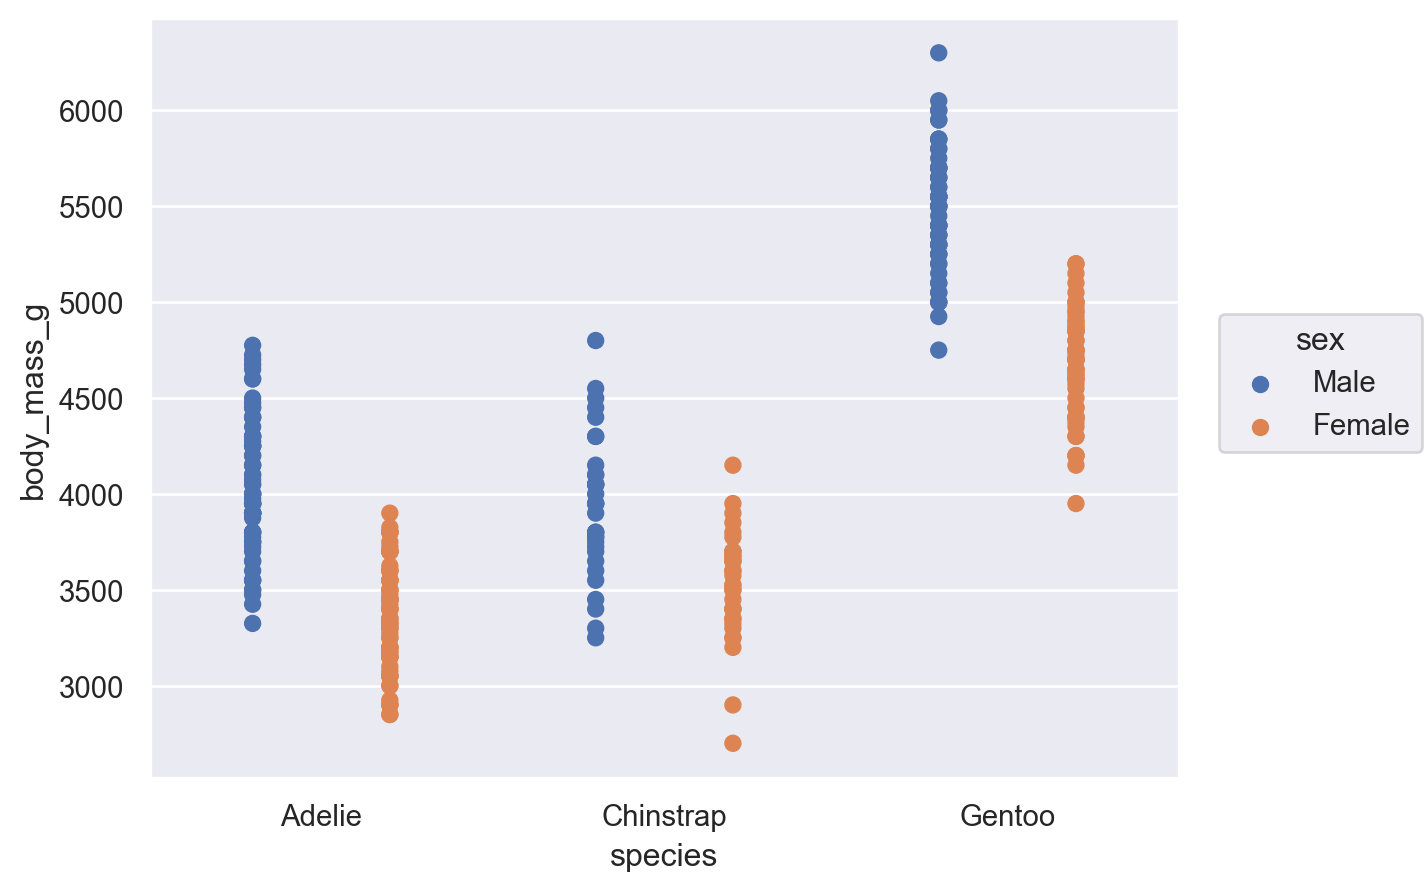

In [43]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

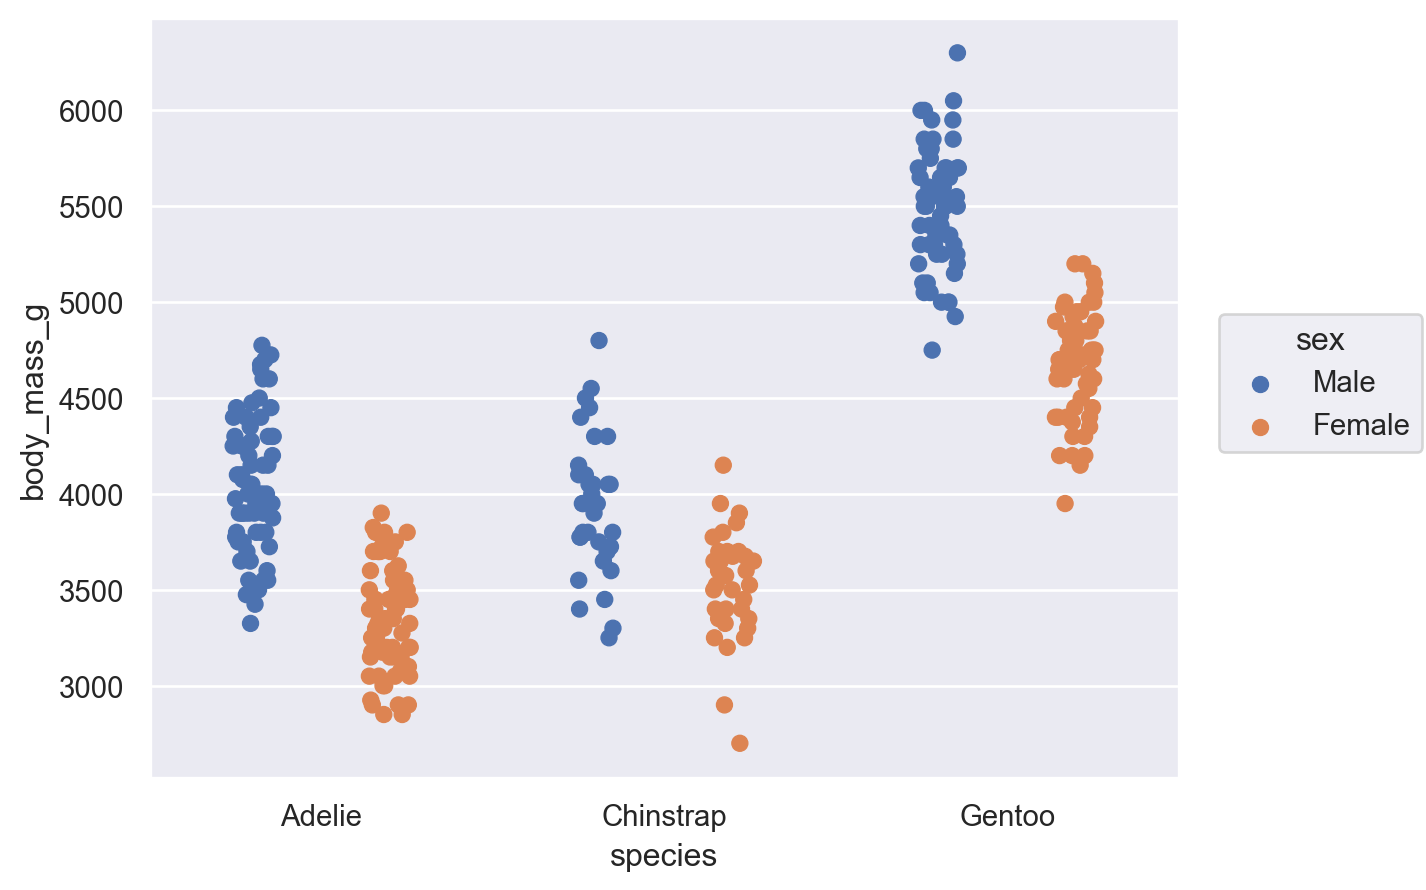

In [44]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

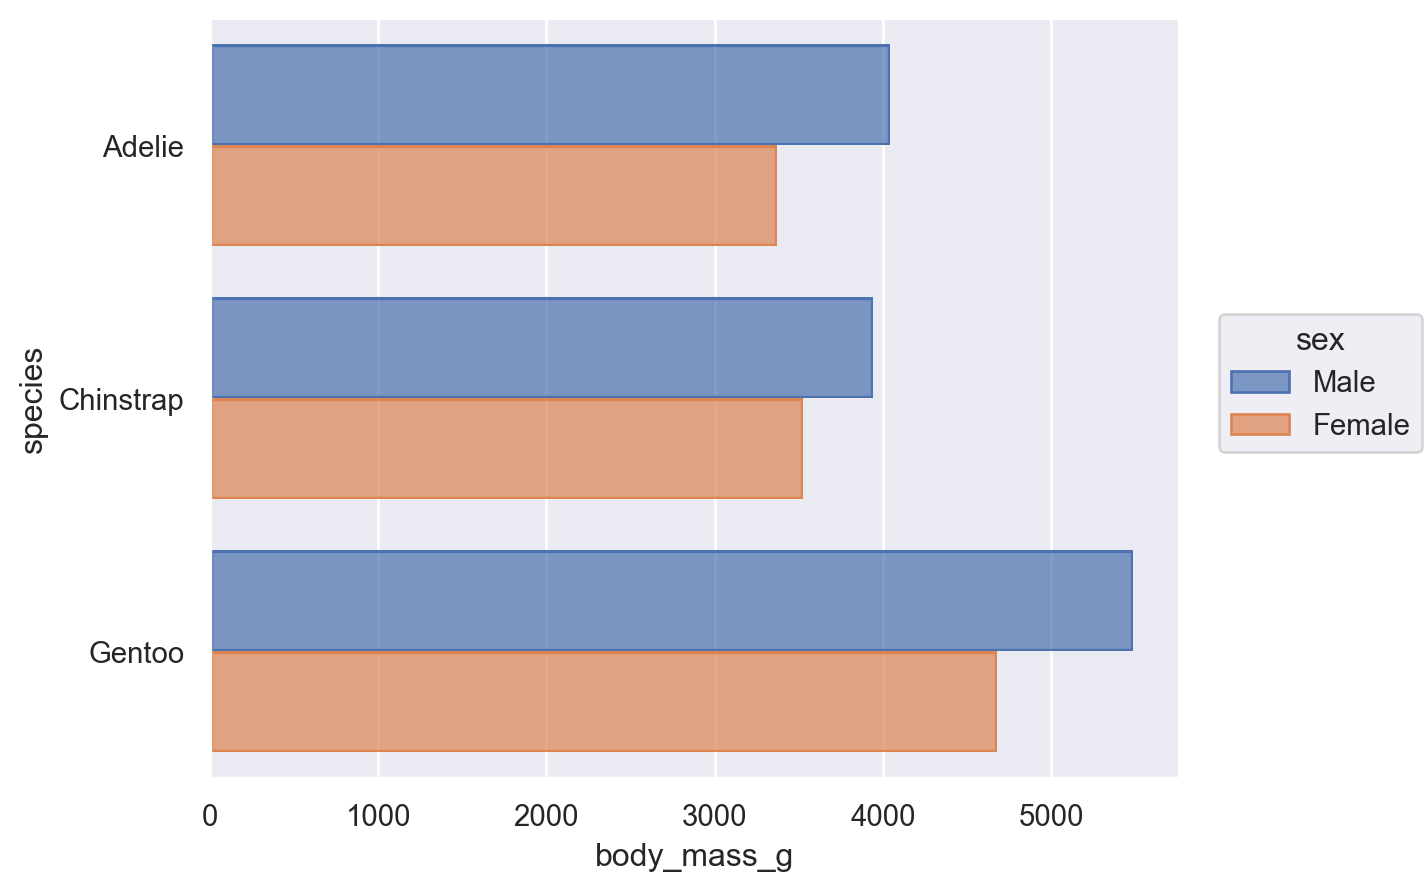

In [45]:
## Orienting marks and transforms
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)

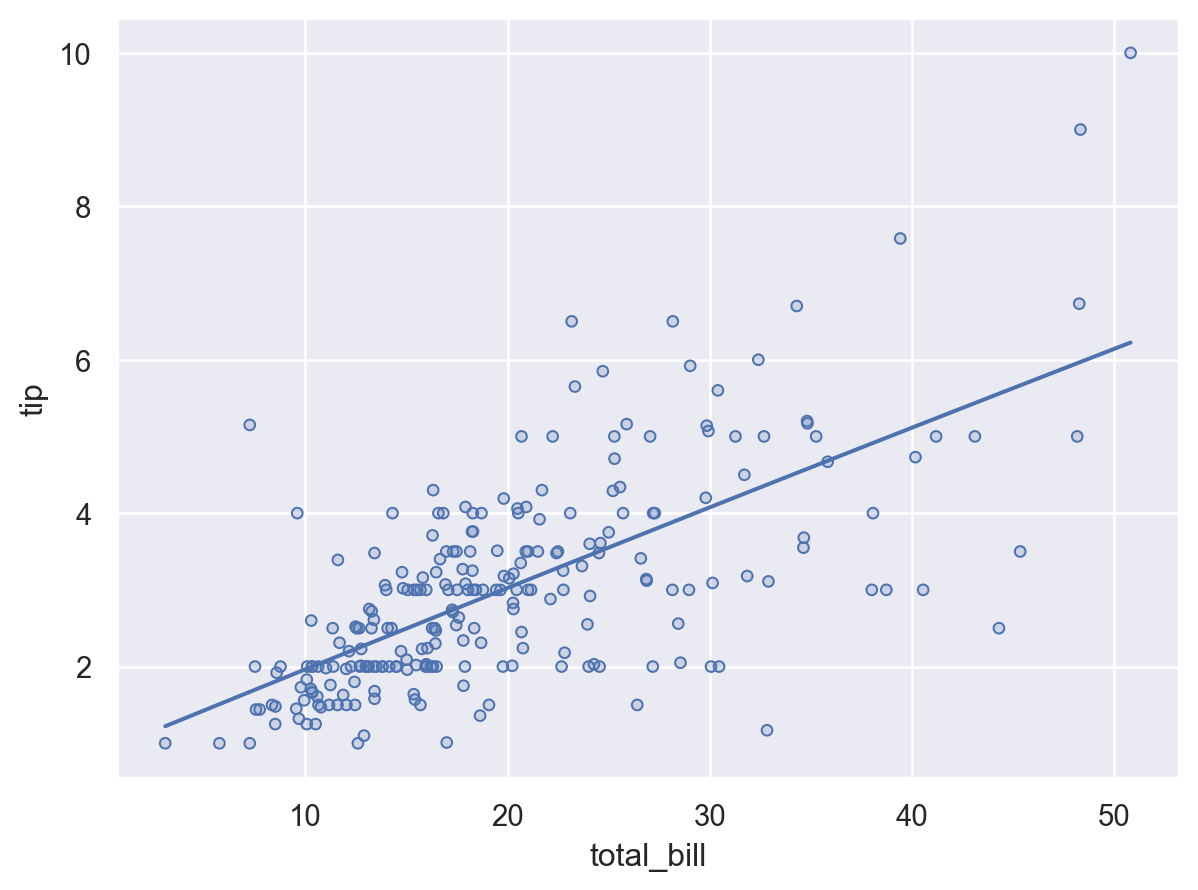

In [46]:
# Building and displaying the plot
## Adding multiple layers
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

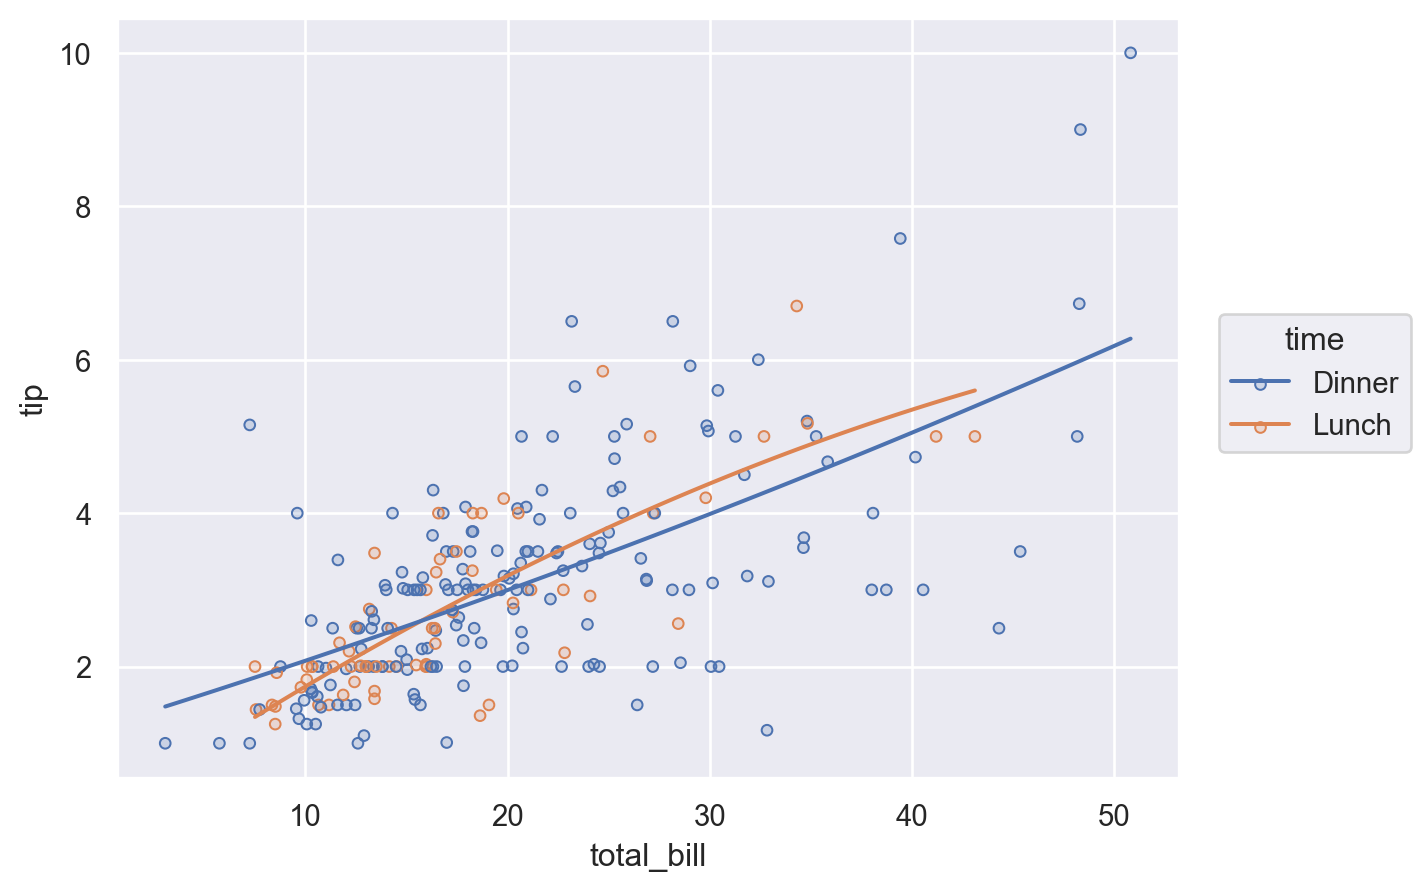

In [47]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

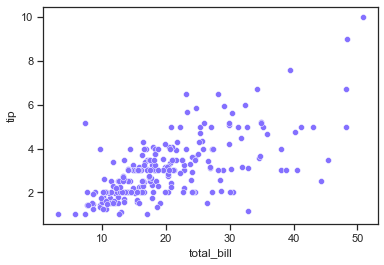

In [54]:
#%%
###################################################### 6-2-1 ###########################################################
# Color properties
## color
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip", color='#8470FF')
#sns.scatterplot(data=tips, x="total_bill", y="tip", color='skyblue')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

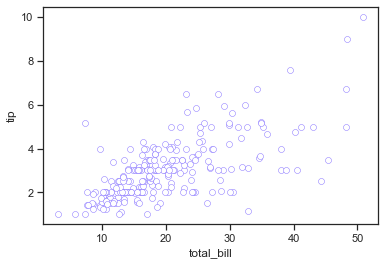

In [53]:
## edgecolor
sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='#8470FF')
#sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='royalblue')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

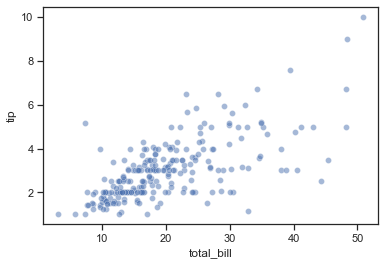

In [52]:
## alpha
sns.scatterplot(data=tips, x="total_bill", y="tip", alpha=0.5)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

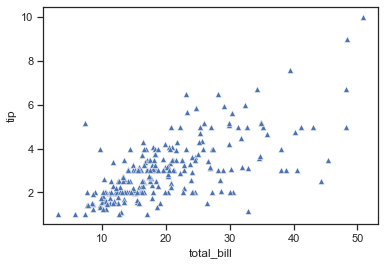

In [56]:

# Style properties
## marker
sns.scatterplot(data=tips, x="total_bill", y="tip", marker='^')
#sns.scatterplot(data=tips, x="total_bill", y="tip", marker='s')
#sns.scatterplot(data=tips, x="total_bill", y="tip", marker='*')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

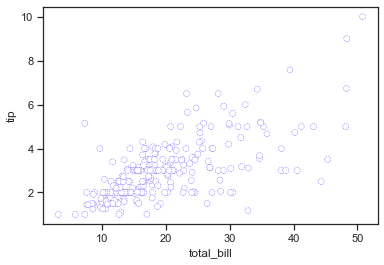

In [57]:

## linestyle, edgestyle
sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='#8470FF', linestyle='--')
#sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='#8470FF', linestyle=':')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

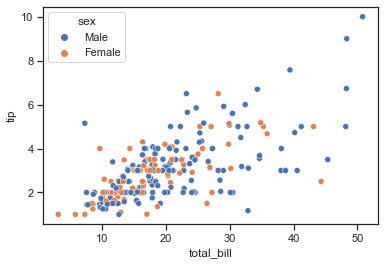

In [59]:
# Size properties
## pointsize
sns.scatterplot(data=tips, x="total_bill", y="tip", hue = 'sex')


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

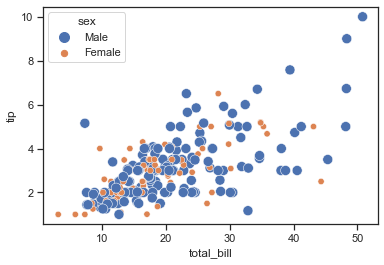

In [60]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue = 'sex', size='sex', sizes=(40,100))

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

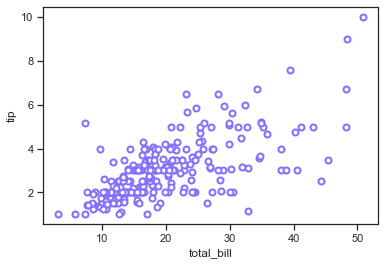

In [61]:
## edgewidth
sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='#8470FF', linewidth=0.5)
sns.scatterplot(data=tips, x="total_bill", y="tip", color='white', edgecolor='#8470FF', linewidth=2)

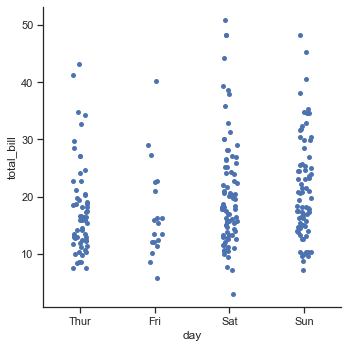

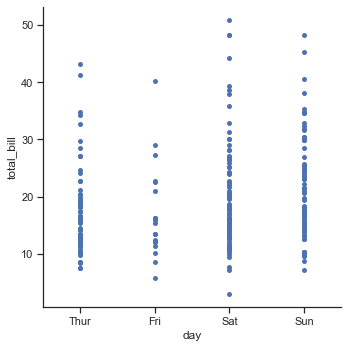

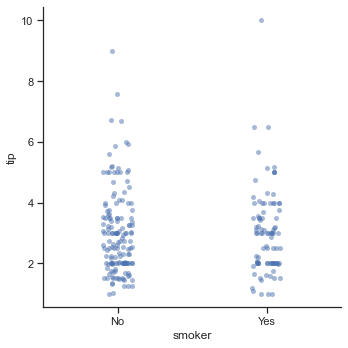

In [65]:
#%%
##################################################### 6-2-2 ###########################################################
# Visualizing categorical data
## Categorical scatter plots
### stripplot
sns.catplot(data=tips, x="day", y="total_bill")
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"], alpha = 0.5)

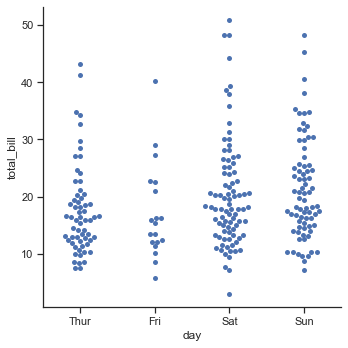

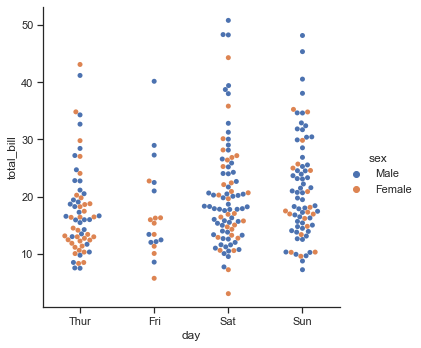

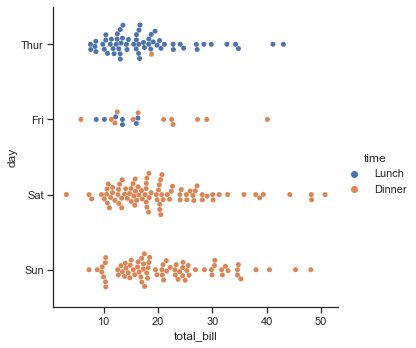

In [63]:
### swarmplot
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

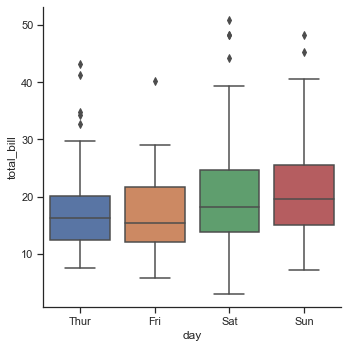

In [68]:
## Categorical distribution plots
### boxplot
sns.catplot(data=tips, x="day", y="total_bill", kind="box")


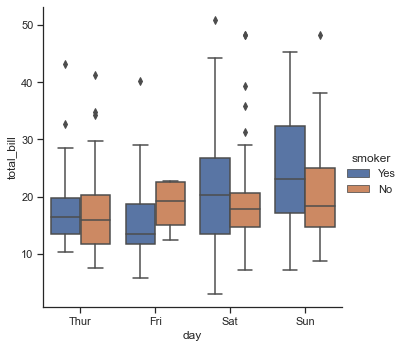

In [69]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

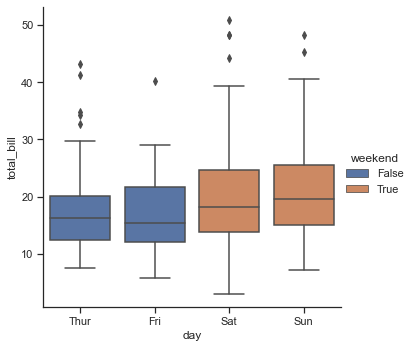

In [70]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box", dodge=False)

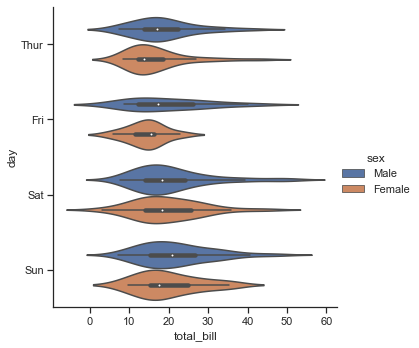

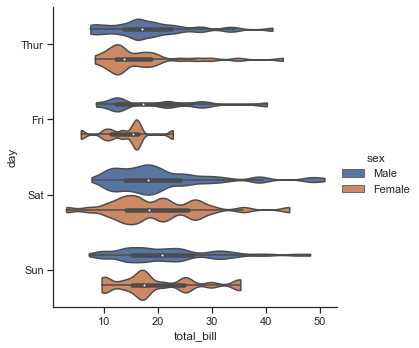

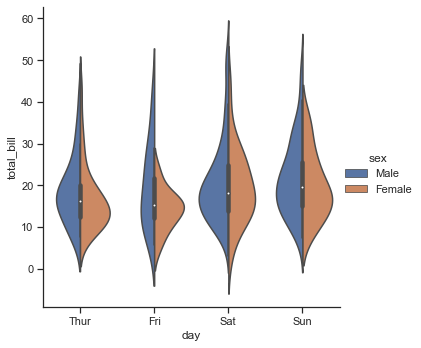

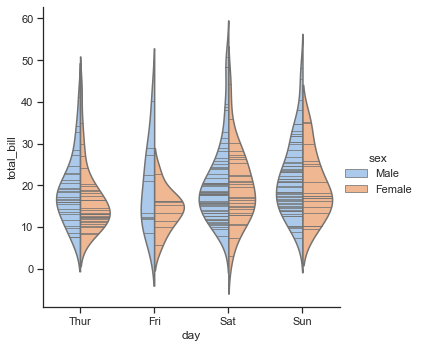

In [71]:
### violinplot
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin")
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin", bw=.15, cut=0)
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin", split=True)
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True, palette="pastel")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

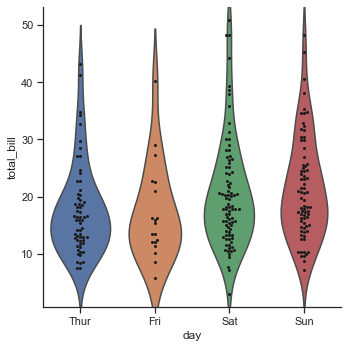

In [72]:
# Combine swarmplot with violin plot
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

### titanic Dataset

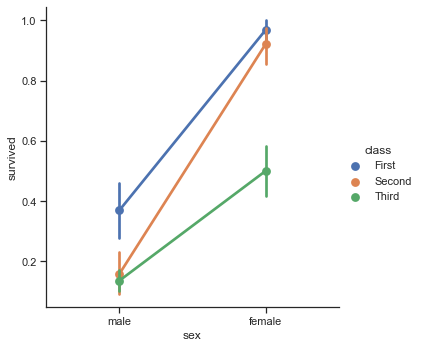

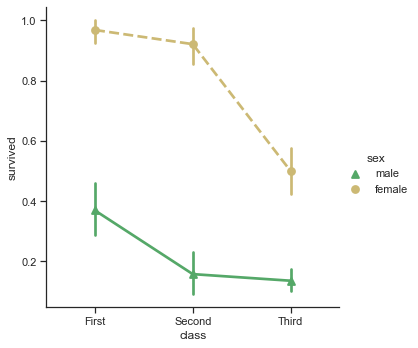

In [73]:
## Categorical estimate plots
titanic = sns.load_dataset("titanic")
### pointplot
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "y"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

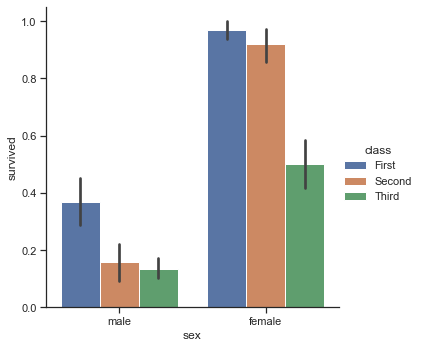

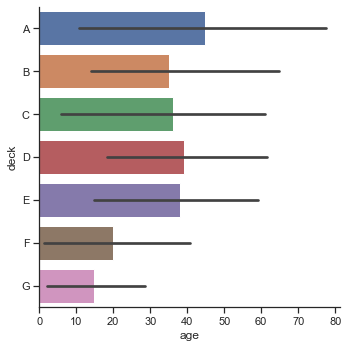

In [74]:
### barplot
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

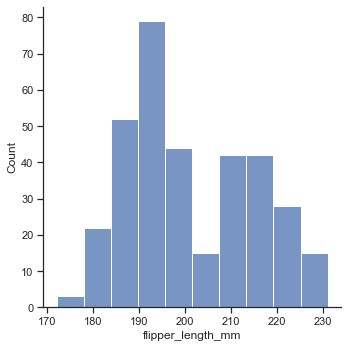

In [75]:
#%%
##################################################### 6-2-3 ###########################################################
# Visualizing distribution of data
## hisplot
penguins = sns.load_dataset("penguins")
# Plotting univariate histograms
sns.displot(penguins, x="flipper_length_mm")

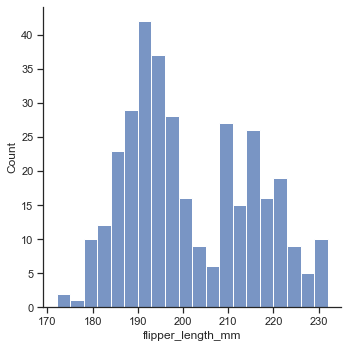

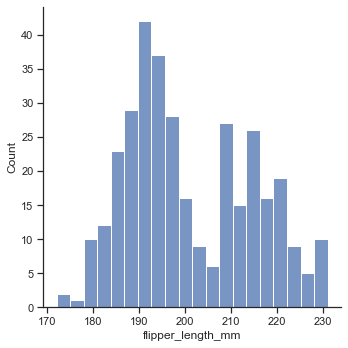

In [76]:
# Choosing the bin size
sns.displot(penguins, x="flipper_length_mm", binwidth=3)
sns.displot(penguins, x="flipper_length_mm", bins=20)

In [ ]:
# Conditioning on other variables
sns.displot(penguins, x="flipper_length_mm", hue="species")
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:

# Visualizing bivariate distributions
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

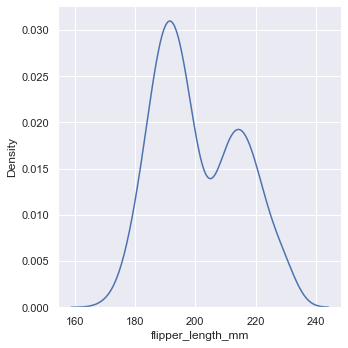

In [116]:

## Kernel density estimation
sns.displot(penguins, x="flipper_length_mm", kind="kde")


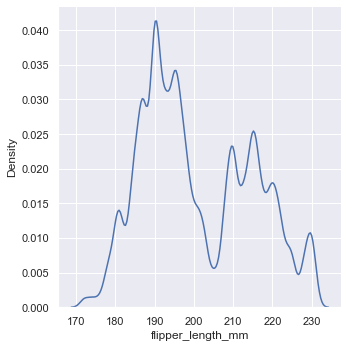

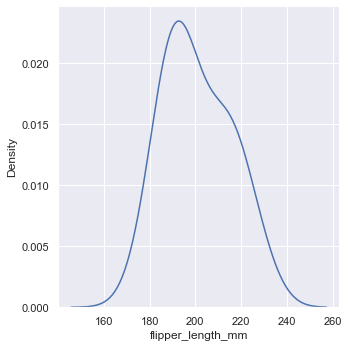

In [117]:
# Choosing the smoothing bandwidth
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

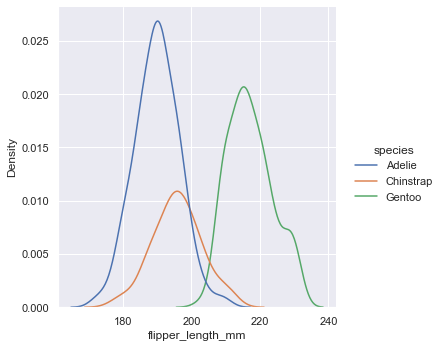

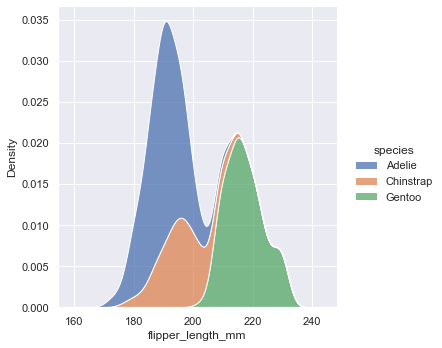

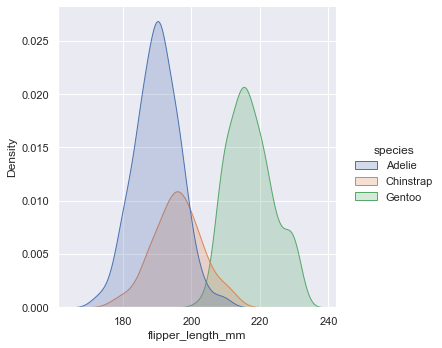

In [118]:

# Conditioning on other variables
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

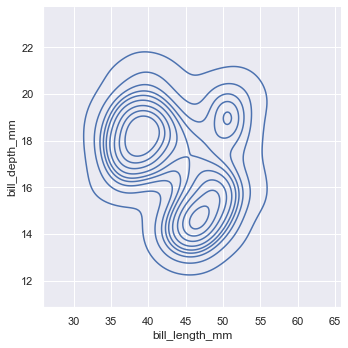

In [124]:
# Visualizing bivariate distributions
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")


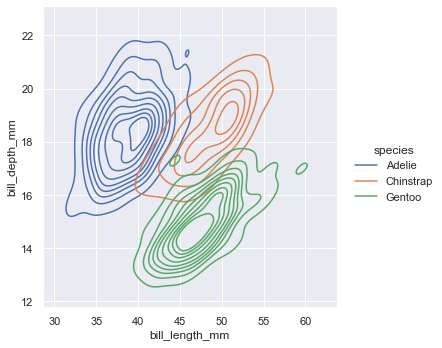

In [128]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", hue="species")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

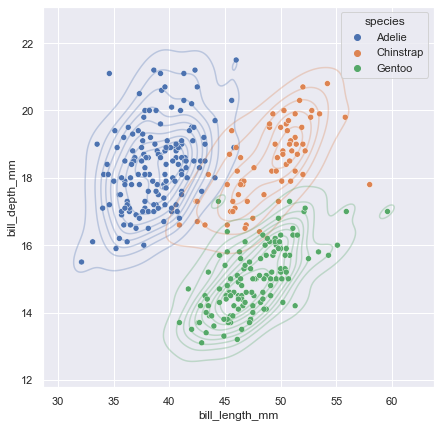

In [149]:
fig, ax = plt.subplots(figsize=(7,7))
sns.kdeplot(x = "bill_length_mm", y = "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=ax)
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data=penguins, hue="species", ax=ax)

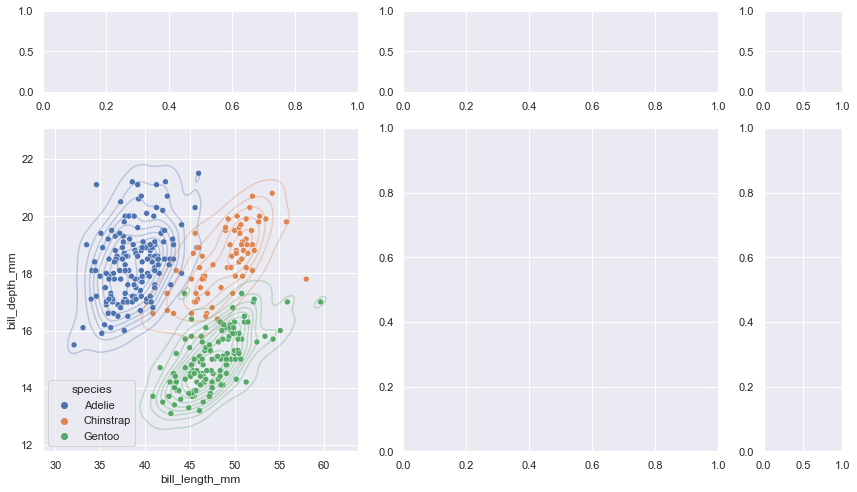

In [148]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

# 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
# 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])
# 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot(x = "bill_length_mm", y = "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])
# 3.2. scatterplot
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

fig.tight_layout()

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

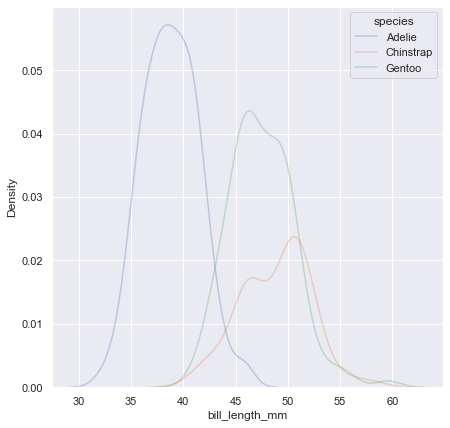

In [153]:
# hisplot + kdeplot
fig, ax = plt.subplots(figsize=(7,7))
#sns.histplot(x = "bill_length_mm", data=penguins, hue="species", ax=ax)
sns.kdeplot(x = "bill_length_mm", data=penguins, hue="species", alpha=0.3, ax=ax)


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

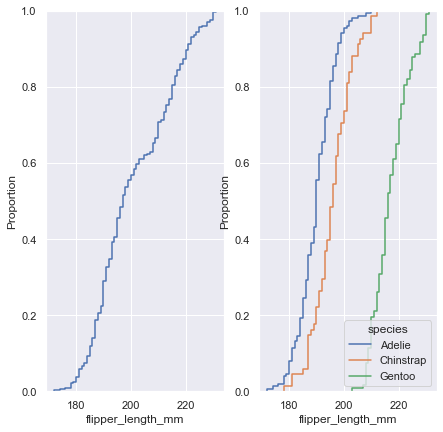

In [154]:
## Empirical cumulative distributions
fig, ax = plt.subplots(1,2, figsize=(7,7))
sns.ecdfplot(data=penguins, x="flipper_length_mm", ax = ax[0])
sns.ecdfplot(data=penguins, x="flipper_length_mm", hue="species", ax = ax[1])